In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 少数第3位まで表示
%precision 3

'%.3f'

<h1>棒グラフ</h1>

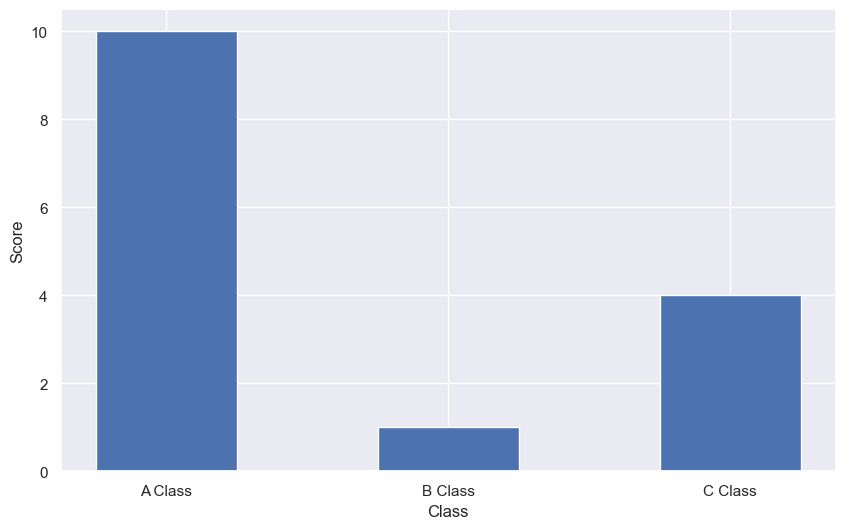

In [3]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize = (10, 6))

plt.bar(x, y, align = 'center', width = 0.5)

# 棒グラフのそれぞれのラベル
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.xlabel('Class')
plt.ylabel('Score')

# グリッドを表示
plt.grid(True)

<h3>横の棒グラフ</h3>

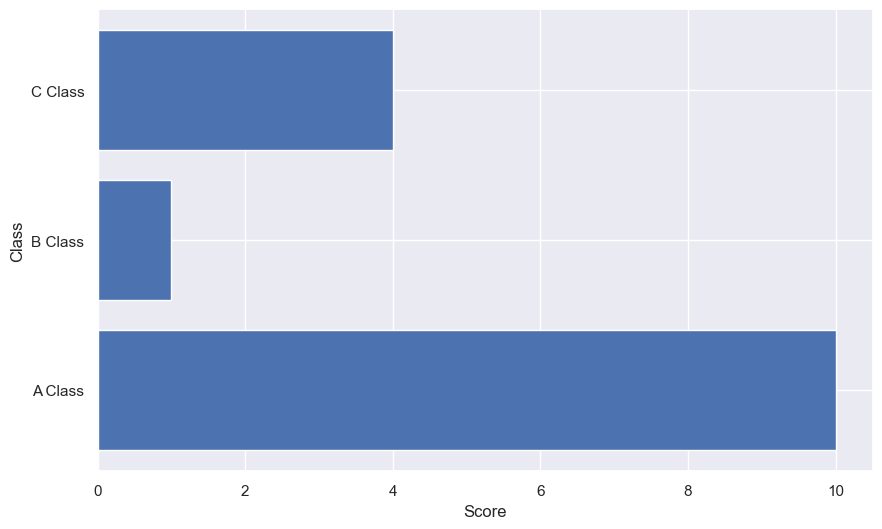

In [5]:
x = [1, 2, 3]
y = [10, 1, 4]

plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center')

# 棒グラフのそれぞれのラベル
plt.yticks(x, ['A Class', 'B Class', 'C Class'])

# xとyのラベルを設定
plt.ylabel('Class')
plt.xlabel('Score')

# グリッドを表示
plt.grid(True)

<h3>複数のグラフを書く</h3>

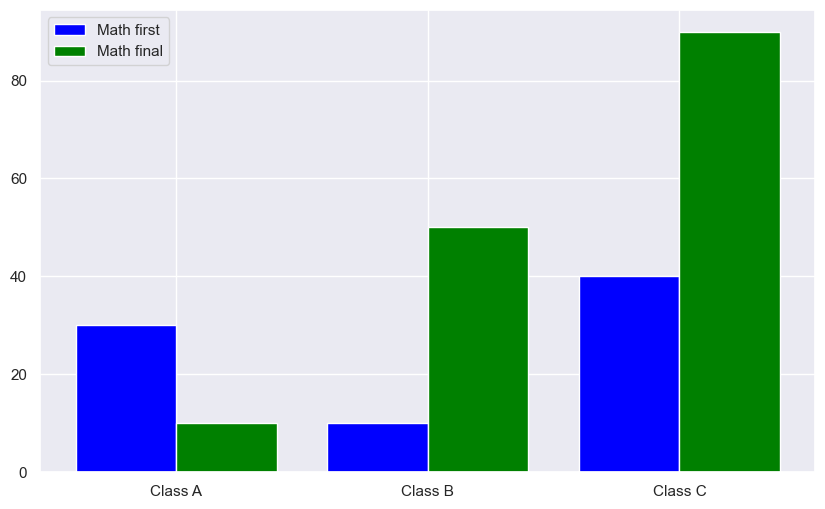

In [6]:
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

x = np.arange(len(y1))

w = 0.4

plt.figure(figsize = (10, 6))

# y2はグラフの幅の分、右にずらして描画する
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color = 'green', width = w, label = 'Math final', align = 'center')

# 凡例を最適な位置に配置
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

<h3>積み上げ棒グラフ</h3>

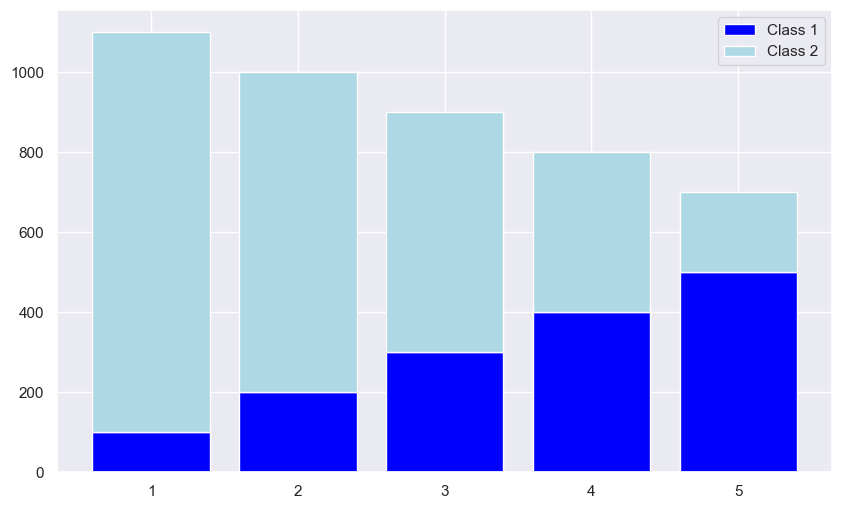

In [7]:
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# x軸
x = np.array([1, 2, 3, 4, 5])

plt.figure(figsize = (10, 6))

p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color = 'lightblue')

# 凡例を表示
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

<h1>円グラフ</h1>

<h3>一般的な円グラフ</h3>

(-1.200, 1.105, -1.100, 1.100)

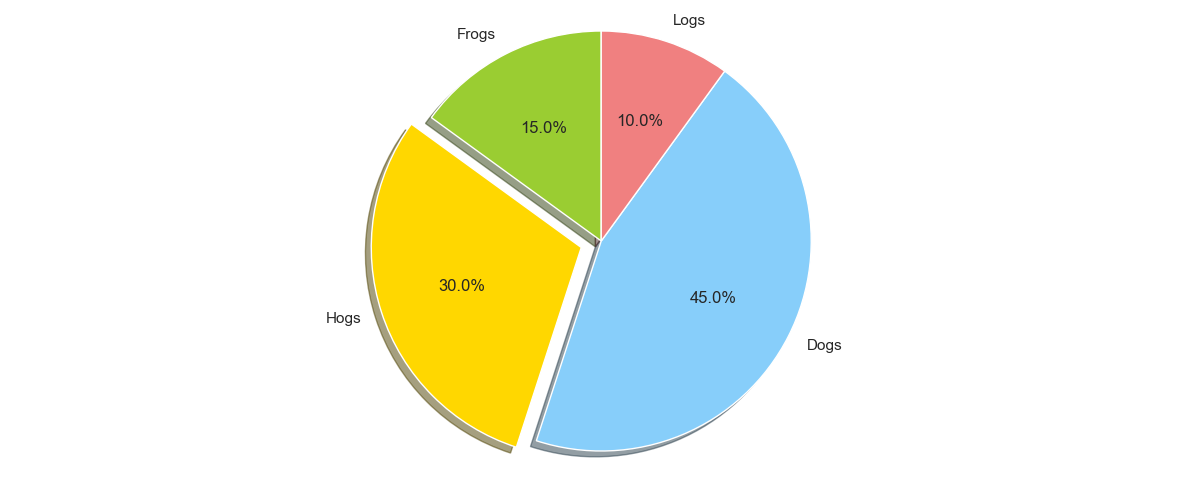

In [9]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)

plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

<h3>バブルチャート</h3>

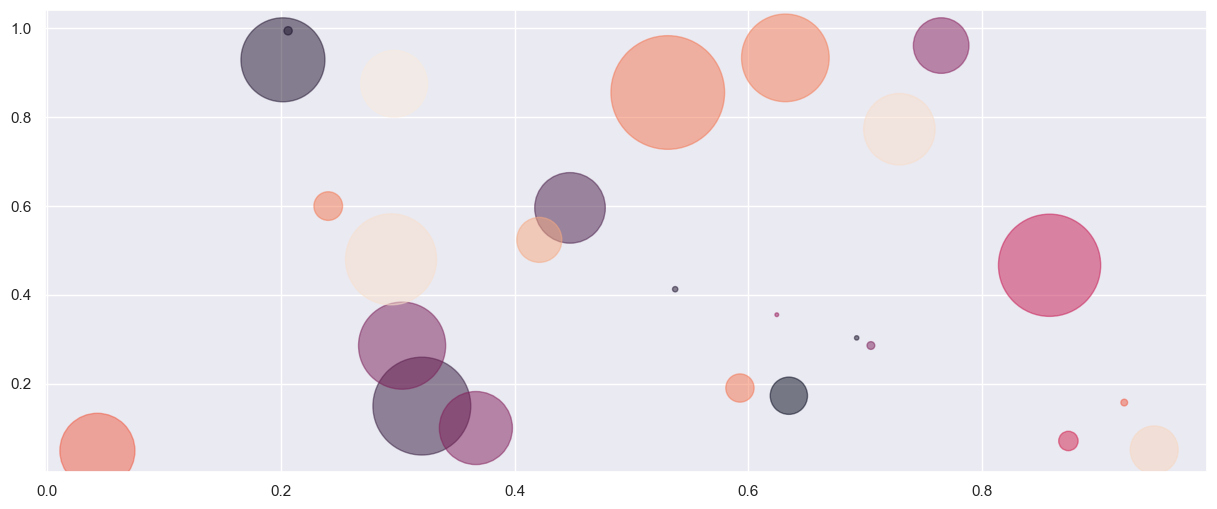

In [11]:
N = 25

# X,Yデータをランダムに生成
x = np.random.rand(N)
y = np.random.rand(N)

# color番号
colors = np.random.rand(N)

# バブルの大きさをばらけさせる
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# グラフの大きさ指定
plt.figure(figsize = (15, 6))

# グラフを描画
plt.scatter(x, y, s = area, c = colors, alpha = 0.5)
plt.grid(True)

<h1>可視化する金融データ</h1>

In [12]:
# 日付データの設定 freq='T'で1分ごとにデータを生成する
idx = pd.date_range('2015/01/01', '2015/12/31 23:59', freq='T')

# 乱数の発生 1か-1を発生させる
dn = np.random.randint(2, size = len(idx)) * 2 - 1

# ランダムウォーク（ランダムに数値が増減するデータ）を作成
# np.cumprodは累積積を算出している（1番目の要素 * 2番目の要素 * 3番目の要素 * ・・・）
rnd_walk = np.cumprod(np.exp(dn * 0.0002)) * 100

# resample('B')でデータ営業日単位でサンプリング
# ohlcメソッドで「open」「high」「low」「close」の4つのデータにする
df = pd.Series(rnd_walk, index = idx).resample('B').ohlc()

<Axes: >

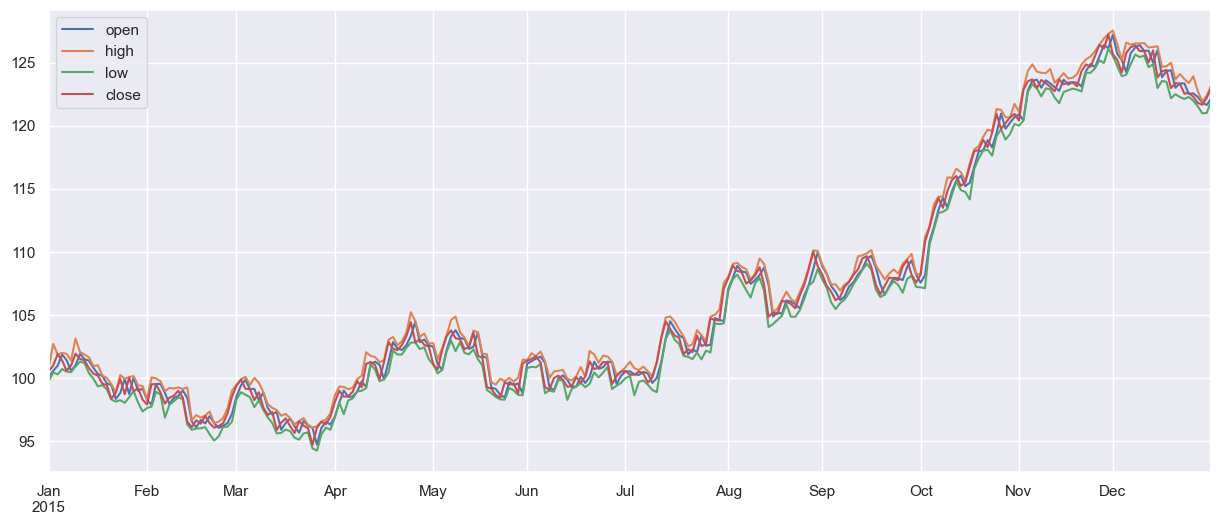

In [13]:
df.plot(figsize = (15, 6), legend = 'best', grid = True)

<h3>ローソクチャートを表示するライブラリ</h3>

In [14]:
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF

init_notebook_mode(connected=True)

# ローソクチャートの設定
fig = FF.create_candlestick(df.open, df.high, df.low, df.close, dates = df.index)
iplot(fig)